In [1]:
# -*- coding: utf-8 -*-
"""
Input: "KCC Data/CkipNewsCisTest-KccDict2020.txt"
Output: "KCC Data/NewsCisTest-KccDict2020-LDA-TopicNum10.txt"

@author: ann
"""
#一開始先把套件讀進來
from gensim import corpora, models, utils
from gensim.models import LdaModel, CoherenceModel
import pandas as pd 
import jieba

In [2]:
df = pd.read_csv("C:/Users/veniv/OneDrive/桌面/108課程/PLOITICAL INFORMATIONox5t/final/KCC Data/concil_news/concil_csv/CisPdf2CsvByIndivSeg_merge.csv") #匯資料
df["date"] = df["file"].str.split("-").str.get(2).str.title() #加Post_Date欄位
df["name"] = df["file"].str.split("-").str.get(4).str.title() #加Post_Date欄位
df.head(20)

# 選特定欄位
df_select = df.iloc[:, [0,1,2,55,56]]
df_select

,index,file,merge,date,name
0,1,1-1-1000516-1-蘇炎城-1,'蘇議員炎城：大會主席許議長、陳市長、各位局長、各位議員同仁以及記者先生、小姐，大家好。高雄...,1000516,蘇炎城
1,2,1-1-1000516-1-蘇炎城-2,'高雄縣市合併後，高雄市對於國中、小的學童上下課通行安全維護的相當不錯，都有裝設倒數計時器，...,1000516,蘇炎城
2,3,1-1-1000516-1-蘇炎城-3,'一個新社區也是需要有其他的建設共同配合，提升社區的生活品質及環境衛生，本席建議加速鳳山區明...,1000516,蘇炎城
3,4,1-1-1000516-1-蘇炎城-4,'這是鳳山第二公有市場，是光復後民國初期的照片，民國三十幾年時的市場就是這樣，這是四十幾年的...,1000516,蘇炎城
4,5,1-1-1000516-1-蘇炎城-5,伊斯坦大﹒貝雅夫﹒正福議員：主席、陳市長、三位副市長、市府各局處長、所有業務單位、議員同仁，...,1000516,蘇炎城
...,...,...,...,...,...
7291,7292,2-8-1071023-4-周玲妏-6,'周議員玲妏：好，謝謝。接下來一點點時間，我想就給我們許市長。主席（康議長裕成）：請許市長回...,1071023,周玲妏
7292,7293,2-8-1071023-4-周玲妏-7,'另外一個部分包含停車的問題，這個也是我一直在強調的，我們這幾年讓學校有財務自主的空間，透過...,1071023,周玲妏
7293,7294,2-8-1071023-4-周玲妏-8,'我再補充一下剛提到坑洞的部分，我最近跟工務局長一直在討論，我們未來真的要嘗試把這些公用管線...,1071023,周玲妏
7294,7295,2-8-1071023-4-周玲妏-9,'其他的問題，老實說有些真的講起來有點複雜，但是包含騎樓是不是能夠適度的讓所有權跟管理權責跟...,1071023,周玲妏


In [3]:
#df_green = df_select[df_select['name']=='李柏毅']
df_green =df_select[ (df_select['date'].str.startswith("106")) & (df_select['name']=='曾麗燕')]
df_green_New = df_green[['index', 'merge']]
df_green_New = df_green_New.dropna()
df_green_New['merge']
df_green

,index,file,merge,date,name
5927,5928,2-5-1060517-2-曾麗燕-1,'曾議員麗燕：大家好。今天是我的市政總質詢時間，這段時間在地區服務和大家相處時，有一些地方上...,1060517,曾麗燕
5928,5929,2-5-1060517-2-曾麗燕-2,'這是我接到陳情的案子，孩子在安養院，去了不到2年，結果被凌辱，不曉得是凌辱或是在那邊長期臥...,1060517,曾麗燕
5929,5930,2-5-1060517-2-曾麗燕-3,'再來，我們要談公有停車場，交通局長，現在公有停車場有的是你們局裡自己經營，有的是委外，我不...,1060517,曾麗燕
6165,6166,2-6-1061115-3-曾麗燕-1,'曾議員麗燕：我先利用1、2分鐘請教一下市長，市長，昨天台北市議會的鍾小平議員在議會裡說有關...,1061115,曾麗燕
6166,6167,2-6-1061115-3-曾麗燕-2,'接下來就我的議題跟市府團隊來做溝通，本席列一些當議員以來的地方建設，我記得我第一個地方建設...,1061115,曾麗燕
6167,6168,2-6-1061115-3-曾麗燕-3,'第二個，就是打通小港區孔宅六街，打通小港跟大寮的一個通路，現在車輛非常非常的多，可見這一條...,1061115,曾麗燕
6168,6169,2-6-1061115-3-曾麗燕-4,'接下來，我們看大林蒲遷村，請播放影片。（影片播放開始）主播：小港大林蒲被800個煙囪整個包...,1061115,曾麗燕


In [4]:
doc_names = range(len(df_green_New))
text_list = list(df_green_New['merge'])
df_green_docs = pd.DataFrame(columns=['jieba_results'])
df_green_docs['jieba_results'] = df_green_docs['jieba_results'].astype('str')

#停用字和自訂字典
jieba.load_userdict("C:/Users/veniv/OneDrive/桌面/108課程/PLOITICAL INFORMATIONox5t/final/KCC Data/Dict/KccDict2020.txt")
stopwords = [line.strip() for line in open('C:/Users/veniv/OneDrive/桌面/108課程/PLOITICAL INFORMATIONox5t/final/KCC Data/Dict/stop_words.txt', 'r', encoding='utf-8').readlines()]  

for i in doc_names:
    
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        if word not in stopwords: 
            text = text + ' ' + str(word)
    s = pd.Series({'jieba_results': text})
    df_green_docs = df_green_docs.append(s, ignore_index=True)  
    
df_green_New.reset_index(inplace=True)  #不設定的話會有錯亂的情形，data對不起來
df_green_New['jieba_results'] = df_green_docs

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\veniv\AppData\Local\Temp\jieba.cache
Loading model cost 0.569 seconds.
Prefix dict has been built successfully.


In [5]:
green_file = df_green_New['jieba_results']
green_file

0     曾議員麗燕 今天 市政總質詢 時間 這段 時間 地區 服務 相處 時 地方 提出 建議 希...
1     接到 陳情 案子 孩子 安養院 不到 年 凌辱 不曉得 凌辱 邊長 期 臥床 照護 人員 ...
2     再來 談 公有 停車場 交通局 長 現在 公有 停車場 有的是 局裡 經營 有的是 委外 ...
3     曾議員麗燕 我先 利用 分鐘 請 教 一下 市長 市長 昨天 台北市議會 鍾 小平 議員 ...
4     接下 議題 市府 團隊 做 溝通 本席 列 議員 地方 建設 記得 第一 地方 建設 請求...
5     第二 打通 小港區 孔宅 六街 打通 小港 大寮 一個 通路 現在 車輛 非常 非常 這一...
6     接下 大林蒲遷村 請 播放 影片 影片 播放 主播 小港 大林蒲 800 煙囪 整個 包圍...
Name: jieba_results, dtype: object

In [6]:
df_green_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   level_0        7 non-null      int64 
 1   index          7 non-null      int64 
 2   merge          7 non-null      object
 3   jieba_results  7 non-null      object
dtypes: int64(2), object(2)
memory usage: 352.0+ bytes


In [7]:
green_list = []
for file in green_file:
            #simple_preprocess: tokenize,去除標點 - gensim.utils.simple_preprocess(doc, deacc=False, min_len=2, max_len=15) 
            green_list.append(list(utils.simple_preprocess(file, deacc=True, min_len=2,)))
            #print(file)
#print(green_list[:1])

In [8]:
#一開始先把套件讀進來
from gensim import corpora, models, utils
from gensim.models import LdaModel, CoherenceModel

In [9]:
dict = corpora.Dictionary(green_list)
print("dict = ", dict)
print("------------------------------")

dict =  Dictionary(1706 unique tokens: ['一下', '一下子', '一件', '一個', '一再']...)
------------------------------


In [10]:
# creat mapping matrix of [word_id, word_frequency] for each word segment
corpus = [dict.doc2bow(text) for text in green_list]   

#上面這邊印出每個字的詞頻
#(a,b) a是編號第幾個字 / b是那個字出現了幾次
print("corpus[:1] = ", corpus[:1])   
print("------------------------------")

# 下面是哪個字具體出現了幾次
print("print lists of [word:frequency]")
[[print((dict[id], freq)) for id,freq in cp] for cp in corpus[:1]]
print("================end of the ouput================")

corpus[:1] =  [[(0, 3), (1, 1), (2, 1), (3, 13), (4, 1), (5, 1), (6, 3), (7, 2), (8, 3), (9, 2), (10, 1), (11, 1), (12, 5), (13, 1), (14, 2), (15, 1), (16, 2), (17, 1), (18, 2), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 3), (25, 1), (26, 2), (27, 2), (28, 1), (29, 1), (30, 1), (31, 5), (32, 1), (33, 2), (34, 1), (35, 1), (36, 1), (37, 3), (38, 1), (39, 1), (40, 1), (41, 1), (42, 2), (43, 1), (44, 1), (45, 6), (46, 1), (47, 1), (48, 4), (49, 1), (50, 1), (51, 2), (52, 1), (53, 2), (54, 1), (55, 3), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 3), (62, 1), (63, 1), (64, 5), (65, 1), (66, 3), (67, 1), (68, 1), (69, 5), (70, 1), (71, 1), (72, 1), (73, 3), (74, 1), (75, 5), (76, 2), (77, 15), (78, 1), (79, 3), (80, 1), (81, 2), (82, 1), (83, 1), (84, 1), (85, 2), (86, 1), (87, 5), (88, 2), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 2), (97, 3), (98, 1), (99, 1), (100, 6), (101, 1), (102, 1), (103, 1), (104, 1), (105, 2), (106, 2), (107, 1), (108, 1), (1

In [11]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [12]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=dict)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [13]:
mallet_path = 'C:/mallet/bin/mallet' # update this path  

In [14]:
# 生成coherence的部分 #會跑滿久的這邊
model_list, coherence_values = compute_coherence_values(dictionary = dict, corpus=corpus, texts=green_list, start=2, limit=40, step=6)

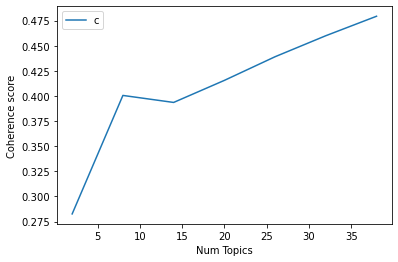

In [15]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [20]:
# 設定模型分類的參數
lda_model = models.ldamodel.LdaModel(corpus=corpus, id2word= dict, num_topics=30, passes=20, alpha='auto', chunksize=50, per_word_topics=True)
output = open("C:/Users/veniv/OneDrive/桌面/108課程/PLOITICAL INFORMATIONox5t/final/LDA-Top10_green.txt", 'w', encoding='utf-8-sig')

#把分好的主題關鍵字印出來 #印20個主題，一個主題20個字
lstTM = lda_model.print_topics(num_topics=35, num_words=10)
for tupleTM in lstTM:
        str1 = "".join(str(x) for x in tupleTM)
        #print("type(str1) = ", type(str1))
        str1 += "\n"
        print("strTM = ", str1) #把主題內的代表字印出來
        output.write(str1)
        
output.close()
 
print("------------------------------")
print("Perplexity = ", lda_model.log_perplexity(corpus))

print("------------------------------")
cm = CoherenceModel(model=lda_model, texts=list(green_file), dictionary=dict, coherence= 'c_v' )
coher_lda = cm.get_coherence()
print("\n Coherence Score: ", coher_lda) #印出聚合分數，越高越好

strTM =  00.001*"一個" + 0.001*"地方" + 0.001*"遷村" + 0.001*"市長" + 0.001*"大林蒲" + 0.001*"非常" + 0.001*"能夠" + 0.001*"議員" + 0.001*"希望" + 0.001*"部分"

strTM =  10.027*"市長" + 0.023*"一個" + 0.022*"台北市" + 0.019*"問題" + 0.016*"這樣子" + 0.011*"曾議員麗燕" + 0.011*"大概" + 0.011*"不好" + 0.011*"縣市" + 0.011*"營利事業"

strTM =  20.001*"市長" + 0.001*"一個" + 0.001*"問題" + 0.001*"部分" + 0.001*"道路" + 0.001*"地方" + 0.001*"曾議員麗燕" + 0.001*"孔宅" + 0.001*"希望" + 0.001*"六街"

strTM =  30.001*"地方" + 0.001*"市長" + 0.001*"道路" + 0.001*"孔宅" + 0.001*"一個" + 0.001*"問題" + 0.001*"能夠" + 0.001*"車輛" + 0.001*"開闢" + 0.001*"部分"

strTM =  40.036*"市長" + 0.030*"圖書館" + 0.024*"答應" + 0.024*"建設" + 0.018*"能夠" + 0.018*"小港" + 0.018*"高雄市" + 0.012*"地方" + 0.012*"非常" + 0.012*"第一"

strTM =  50.001*"一個" + 0.001*"曾議員麗燕" + 0.001*"部分" + 0.001*"能夠" + 0.001*"之家" + 0.001*"地方" + 0.001*"護理" + 0.001*"問題" + 0.001*"市長" + 0.001*"安養院"

strTM =  60.001*"地方" + 0.001*"一個" + 0.001*"市長" + 0.001*"問題" + 0.001*"議員" + 0.001*"大林蒲" + 0.001*"土地" + 0.001*"遷村" + 0.001*"非常" + 0.001*"希望"

strTM =  

C:\Users\veniv\.conda\envs\ck100\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:202: RuntimeWarning: invalid value encountered in true_divide
  numerator = (co_occur_count / num_docs) + EPSILON
C:\Users\veniv\.conda\envs\ck100\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:203: RuntimeWarning: invalid value encountered in true_divide
  denominator = (w_prime_count / num_docs) * (w_star_count / num_docs)
C:\Users\veniv\.conda\envs\ck100\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:198: RuntimeWarning: invalid value encountered in true_divide
  co_doc_prob = co_occur_count / num_docs



 Coherence Score:  nan


In [21]:
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

pyLDAvis.enable_notebook

# 因為分了很多群，所以後面需要加 mds='mmds'
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dict, doc_topic_dist=None, mds='mmds')

"""
參數說明：
準備（topic_model，語料庫，字典，doc_topic_dist =無）
topic_model：訓練得到的gensim LdaModel對象，不支持其他gensim模型類型
語料庫：以詞袋形式表示的語料（用於訓練主題模型的語料）
字典：用於造詞袋模型的字典，即gensim字典對象
doc_topic_dist：可選參數，用於LDA模型的文檔主題分佈，替換取值無，當需要多次調用prepare函數時，可以替換該參數
"""
pyLDAvis.display(vis)